<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 160.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 179.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 116.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 151.0 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
# Define critical columns
critical_columns = ['Employment', 'JobSat', 'RemoteWork']

# Count missing values and calculate percentages
missing_counts = df[critical_columns].isnull().sum()
missing_percentages = (missing_counts / len(df)) * 100

# Display missing value summary
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})

print(missing_summary)



            Missing Count  Missing Percentage
Employment              0            0.000000
JobSat              36311           55.490013
RemoteWork          10631           16.246160


In [4]:
# Fill missing 'JobSat' with its mode
job_sat_mode = df['JobSat'].mode()[0]
df['JobSat'] = df['JobSat'].fillna(job_sat_mode)

# Fill missing 'RemoteWork' with its mode
remote_work_mode = df['RemoteWork'].mode()[0]
df['RemoteWork'] = df['RemoteWork'].fillna(remote_work_mode)

# Check for remaining missing values
print(df[['JobSat', 'RemoteWork']].isnull().sum())

JobSat        0
RemoteWork    0
dtype: int64


In [7]:
df.shape

(65437, 114)

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


  ExperienceRange  JobSat
0             0–5     8.0
1            5–10     8.0
2           10–20     8.0
3             20+     8.0


/tmp/ipykernel_299/1664507005.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median().reset_index()


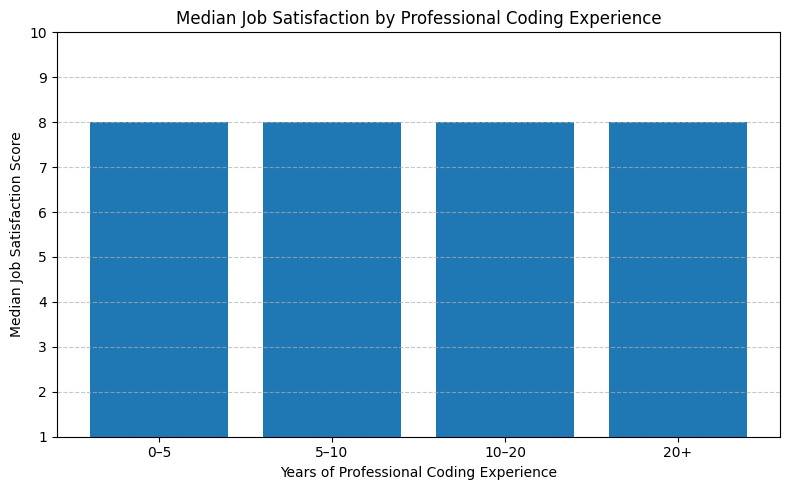

In [6]:
# Clean and convert YearsCodePro
def convert_years(x):
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 51
    try:
        return float(x)
    except:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years)

# Define experience bins
bins = [0, 5, 10, 20, 100]
labels = ['0–5', '5–10', '10–20', '20+']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Group by experience range and calculate median satisfaction
median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
print(median_satisfaction)

import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(8, 5))
plt.bar(median_satisfaction['ExperienceRange'].astype(str), median_satisfaction['JobSat'])
plt.title('Median Job Satisfaction by Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction Score')
plt.ylim(1, 10)  # Satisfaction scale from 1 to 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


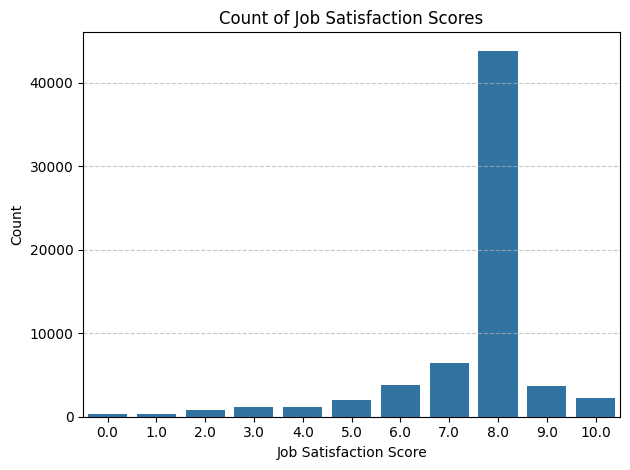

In [7]:
## Write your code here
sns.countplot(data=df, x='JobSat', order=sorted(df['JobSat'].dropna().unique()))
plt.title('Count of Job Satisfaction Scores')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


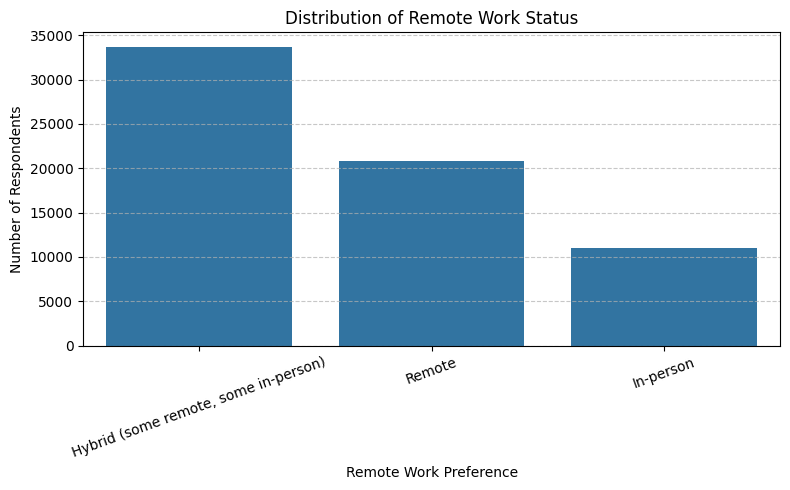

In [8]:
## Write your code here
# Set up figure
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index)

# Customize
plt.title('Distribution of Remote Work Status')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [10]:
# Group by Employment and DevType, then count RemoteWork
grouped = df.groupby(['Employment', 'DevType', 'RemoteWork']).size().reset_index(name='Count')

# Pivot the data to make it easier to visualize
pivot_table = grouped.pivot_table(index=['Employment', 'DevType'], columns='RemoteWork', values='Count', fill_value=0)

print(pivot_table.head())


RemoteWork                                         Hybrid (some remote, some in-person)  \
Employment          DevType                                                               
Employed, full-time Academic researcher                                           324.0   
                    Blockchain                                                     17.0   
                    Cloud infrastructure engineer                                 220.0   
                    Data engineer                                                 430.0   
                    Data or business analyst                                      178.0   

RemoteWork                                         In-person  Remote  
Employment          DevType                                           
Employed, full-time Academic researcher                209.0    43.0  
                    Blockchain                          14.0    66.0  
                    Cloud infrastructure engineer       42.0   216.0  
       

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


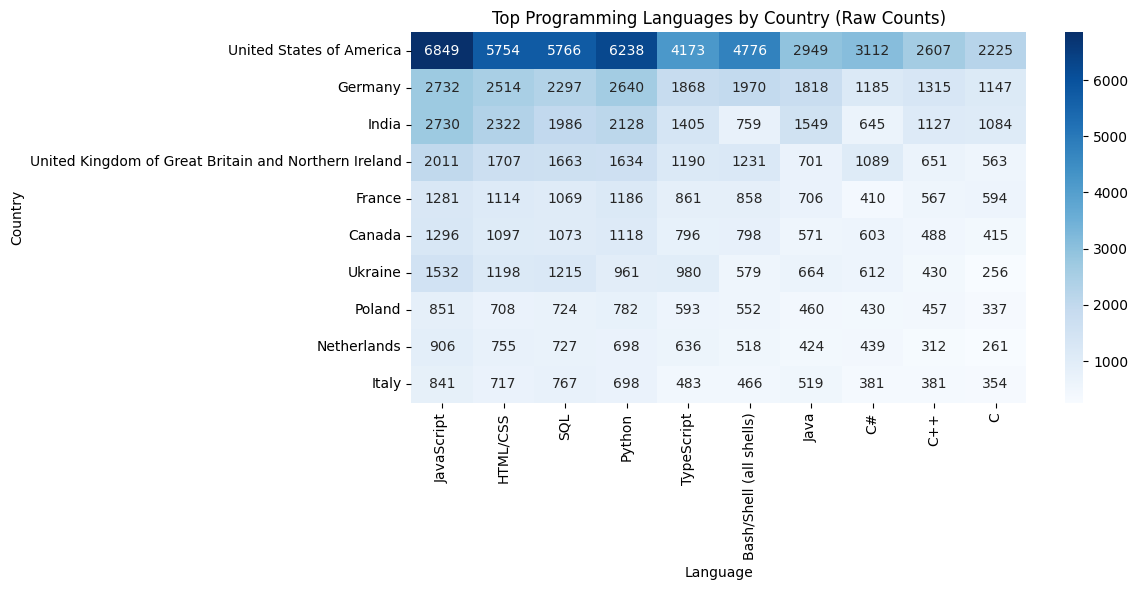

In [11]:
## Write your code here
# Filter necessary columns
df_lang = df[['Country', 'LanguageHaveWorkedWith']].dropna()

# Split and explode the languages
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_lang.explode('LanguageHaveWorkedWith')

# Group and count
lang_counts = df_exploded.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# Pivot for heatmap (countries as rows, languages as columns)
lang_pivot = lang_counts.pivot(index='Country', columns='LanguageHaveWorkedWith', values='Count').fillna(0)

# Choose top N countries and languages for readability
top_countries = lang_pivot.sum(axis=1).sort_values(ascending=False).head(10).index
top_languages = lang_pivot.sum(axis=0).sort_values(ascending=False).head(10).index

# Filter data
filtered_heatmap = lang_pivot.loc[top_countries, top_languages]

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_heatmap, annot=True, fmt=".0f", cmap='Blues')
plt.title('Top Programming Languages by Country (Raw Counts)')
plt.xlabel('Language')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


<Figure size 1000x600 with 0 Axes>

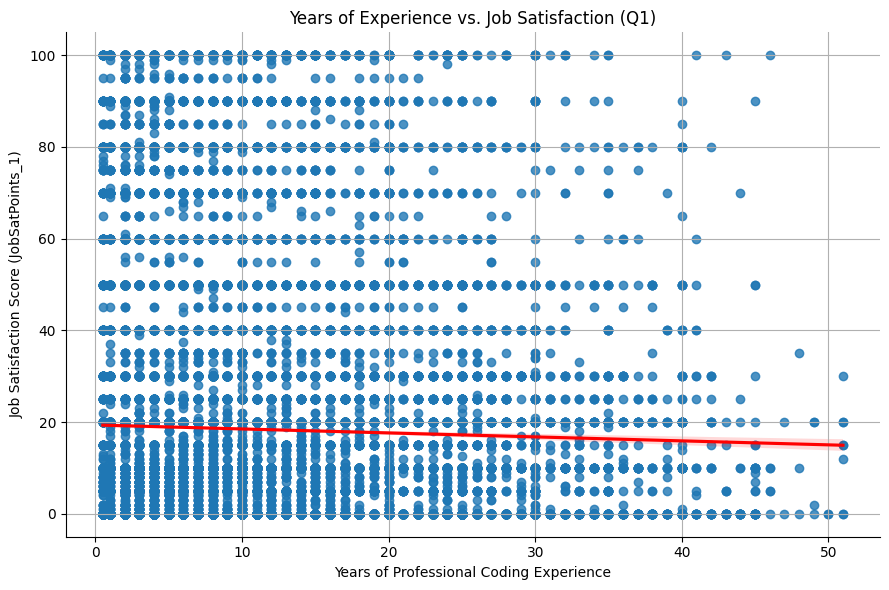

In [14]:
## Write your code here
def convert_years(x):
    if pd.isnull(x):
        return None
    if x == 'Less than 1 year':
        return 0.5
    if x == 'More than 50 years':
        return 51
    try:
        return float(x)
    except:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years)

df_scatter = df[['YearsCodePro', 'JobSatPoints_1']].dropna() #drop missing data

# Plot
plt.figure(figsize=(10, 6))
#sns.scatterplot(data=df_scatter, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)

# Customize
sns.lmplot(data=df_scatter, x='YearsCodePro', y='JobSatPoints_1', height=6, aspect=1.5,line_kws={'color': 'red'}) #regression line
plt.title('Years of Experience vs. Job Satisfaction (Q1)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score (JobSatPoints_1)')
plt.grid(True)
plt.tight_layout()
plt.show()



#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [16]:
print(df['Employment'].value_counts(dropna=False))

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

In [19]:
# Define mapping to consolidate categories
employment_map = {
    'Employed, full-time': 'Employed',
    'Employed, part-time': 'Employed',
    'Independent contractor, freelancer, or self-employed': 'Employed',
    'Student, full-time': 'Student',
    'Student, part-time': 'Student',
    'Not employed, but looking for work': 'Unemployed',
    'Not employed, and not looking for work': 'Unemployed',
    'Retired': 'Other',
    'I prefer not to say': 'Other',
    'Other': 'Other'
}

# Apply mapping
df['Employment'] = df['Employment'].map(employment_map)
print(df['Employment'].value_counts(dropna=False))

Employment
Employed      45153
NaN           11036
Student        5203
Unemployed     2974
Other          1071
Name: count, dtype: int64


Raw Counts:
 Employment                                          Employed  Other  Student  \
EdLevel                                                                        
Associate degree (A.A., A.S., etc.)                     1241     27       93   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)           18797    254     1021   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        12674    170      265   
Primary/elementary school                                243     57      465   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)          2395    125       42   
Secondary school (e.g. American high school, Ge...      1939    110     1856   
Some college/university study without earning a...      4448    128      804   
Something else                                           469     94      124   

Employment                                          Unemployed  
EdLevel                                                         
Associate degree (A.A., A.S., etc.)                     

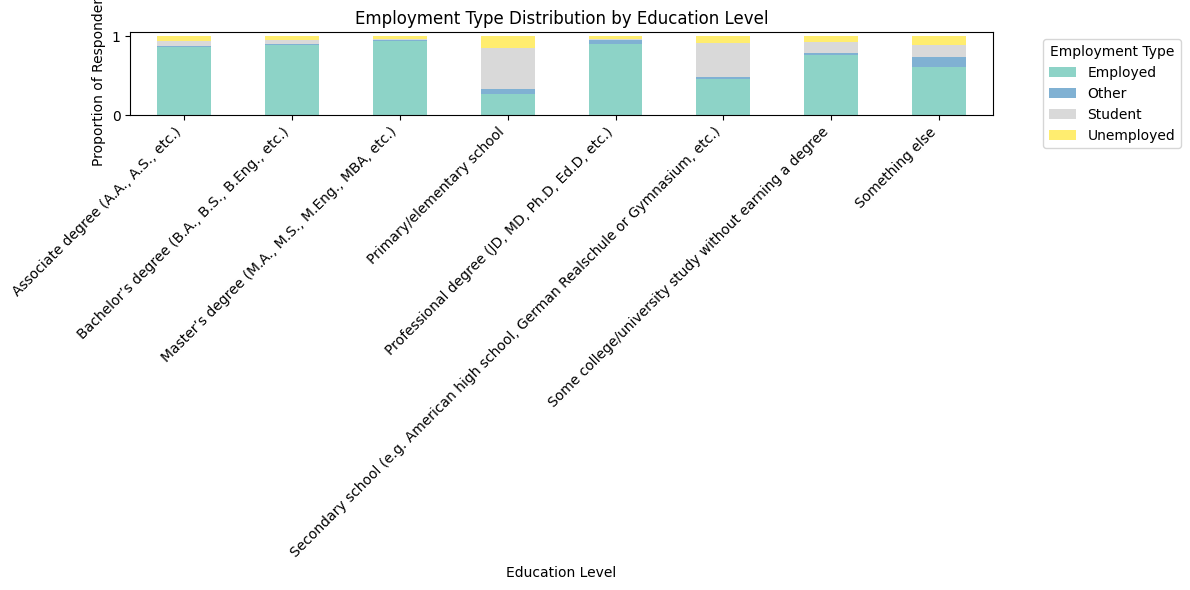

In [20]:
## Write your code here
# Create a cross-tabulation of education level vs. employment type
edu_emp_crosstab = pd.crosstab(df['EdLevel'], df['Employment'])

# Show raw counts
print("Raw Counts:\n", edu_emp_crosstab)

#normalize by education level
edu_emp_prop = edu_emp_crosstab.div(edu_emp_crosstab.sum(axis=1), axis=0)
print("\nProportions (Normalized):\n", edu_emp_prop)

# Plot a stacked bar chart for normalized proportions
edu_emp_prop.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')

plt.title('Employment Type Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [21]:
## Write your code here
# Save to a new CSV file
df.to_csv('cleaned_survey_data.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
